## libs

In [1]:
# python utils
import itertools
import inspect

# pre-processing and exploring data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# model building
from minisom import MiniSom 

## Import Data

In [40]:
column_names = [
        'sepal_length', 
        'sepal_width',
        'petal_length', 
        'petal_width', 
        'class'
        ]

df = pd.read_csv('../datasets/iris.csv', names=column_names, header=0)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Preprocessing Data

In [44]:
df['class'] = df['class'].factorize()[0]
df['class'] = df['class'].astype("category")
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

In [45]:
# split in input and output sets
input_df = df.drop("class", axis=1)
output_df = df["class"]

In [5]:
# normalizing values of input df between 0 and 1 (per column)
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

input_df = normalize(input_df)
input_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.166667,0.416667,0.067797,0.041667
1,0.111111,0.500000,0.050847,0.041667
2,0.083333,0.458333,0.084746,0.041667
3,0.194444,0.666667,0.067797,0.041667
4,0.305556,0.791667,0.118644,0.125000


In [6]:
# minsisom lib expects input_data as numpy matrix not pandas, converting...
input_data = input_df.values
input_data

array([[0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     , 0.06779661, 0.08333333],
       [0.38888889, 0.75      ,

## Model builder

In [27]:
def build_som_model(size, input_len, sigma, learning_rate):
    return MiniSom(size, size, input_len, sigma=sigma, learning_rate=learning_rate, 
                   neighborhood_function='bubble', random_seed=10)

def build_models(builder_method, *args_tests):
    """
    Build models with all the combinations of the args_test passed
    """
    builder_args_names = list(inspect.signature(builder_method).parameters.keys())
    return [
        dict((("model", builder_method(*args)),) + tuple(zip(builder_args_names, args)))
        for args in itertools.product(*args_tests)
    ]

## Models Definition

In [28]:
# Parameters definition

# fixed
input_len = [4]
size_tests = [32]

# tests
sigma_tests = [10, 5, 3, 1]
learning_rate_tests = [5, 1, 0.1, 0.01]

In [29]:
# building models with all the combinations of the test parameters
models = build_models(
    build_som_model,
    size_tests,
    input_len,
    sigma_tests,
    learning_rate_tests,
)
models

[{'model': <minisom.MiniSom at 0x7fc31fd82c90>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 5},
 {'model': <minisom.MiniSom at 0x7fc31fd82850>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 1},
 {'model': <minisom.MiniSom at 0x7fc31fd82750>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 0.1},
 {'model': <minisom.MiniSom at 0x7fc31fd82150>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 0.01},
 {'model': <minisom.MiniSom at 0x7fc31fd82cd0>,
  'size': 32,
  'input_len': 4,
  'sigma': 5,
  'learning_rate': 5},
 {'model': <minisom.MiniSom at 0x7fc31fd82810>,
  'size': 32,
  'input_len': 4,
  'sigma': 5,
  'learning_rate': 1},
 {'model': <minisom.MiniSom at 0x7fc31fd82e50>,
  'size': 32,
  'input_len': 4,
  'sigma': 5,
  'learning_rate': 0.1},
 {'model': <minisom.MiniSom at 0x7fc31fd82910>,
  'size': 32,
  'input_len': 4,
  'sigma': 5,
  'learning_rate': 0.01},
 {'model': <minisom.MiniSom at 0x7fc31fd82290>,
  

## Models Training

In [30]:
for model in models:
    model['model'].pca_weights_init(input_data)
    model['model'].train_batch(input_data, 10000, verbose=False)
    model['quantization_error'] = model['model'].quantization_error(input_data)
    model['topographic_error'] = model['model'].topographic_error(input_data)

In [31]:
models

[{'model': <minisom.MiniSom at 0x7fc31fd82c90>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 5,
  'quantization_error': nan,
  'topographic_error': 1.0},
 {'model': <minisom.MiniSom at 0x7fc31fd82850>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 1,
  'quantization_error': 0.04872708403156791,
  'topographic_error': 0.020134228187919462},
 {'model': <minisom.MiniSom at 0x7fc31fd82750>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 0.1,
  'quantization_error': 0.04980783294237214,
  'topographic_error': 0.9664429530201343},
 {'model': <minisom.MiniSom at 0x7fc31fd82150>,
  'size': 32,
  'input_len': 4,
  'sigma': 10,
  'learning_rate': 0.01,
  'quantization_error': 0.07377661965090046,
  'topographic_error': 0.9261744966442953},
 {'model': <minisom.MiniSom at 0x7fc31fd82cd0>,
  'size': 32,
  'input_len': 4,
  'sigma': 5,
  'learning_rate': 5,
  'quantization_error': 0.5804552919739426,
  'topographic_error': 1.0},
 {'model': 

# Results

### Top Models

In [32]:
# Sorting models by topographic_error
for i, model in enumerate(sorted(models, key=lambda d: d['topographic_error'], reverse=False)):
    print("TOP {}:".format(i + 1))
    print("    quantization error: {}".format(model["quantization_error"]))
    print("    topographic error: {}".format(model["topographic_error"]))
    print("    map size (NxN): {}".format(model["size"]))
    print("    sigma: {}".format(model["sigma"]))
    print("    learning_rate: {}".format(model["learning_rate"]))
    print()

TOP 1:
    quantization error: 0.04872708403156791
    topographic error: 0.020134228187919462
    map size (NxN): 32
    sigma: 10
    learning_rate: 1

TOP 2:
    quantization error: 0.0007491436373034187
    topographic error: 0.040268456375838924
    map size (NxN): 32
    sigma: 3
    learning_rate: 1

TOP 3:
    quantization error: 0.07958090883050664
    topographic error: 0.8053691275167785
    map size (NxN): 32
    sigma: 3
    learning_rate: 0.01

TOP 4:
    quantization error: 0.14042394158466853
    topographic error: 0.8120805369127517
    map size (NxN): 32
    sigma: 1
    learning_rate: 1

TOP 5:
    quantization error: 0.16632730397525738
    topographic error: 0.8322147651006712
    map size (NxN): 32
    sigma: 1
    learning_rate: 0.1

TOP 6:
    quantization error: 0.16915401900916177
    topographic error: 0.8322147651006712
    map size (NxN): 32
    sigma: 1
    learning_rate: 0.01

TOP 7:
    quantization error: 0.07042358255143456
    topographic error: 0.852

# Analysis (using the Top 1 model)

In [63]:
model = [model for model in models if model["sigma"] == 10 and model["learning_rate"] == 1][0]

In [64]:
model

{'model': <minisom.MiniSom at 0x7fc31fd82850>,
 'size': 32,
 'input_len': 4,
 'sigma': 10,
 'learning_rate': 1,
 'quantization_error': 0.04872708403156791,
 'topographic_error': 0.020134228187919462}

## U-Matrix

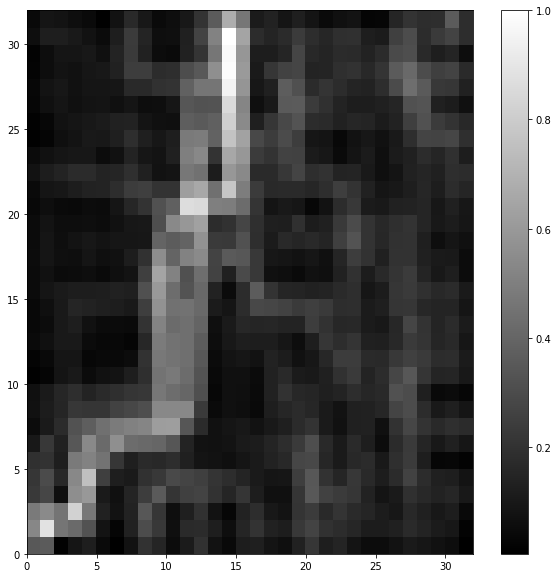

In [66]:
plt.figure(figsize=(10, 10))
plt.pcolor(model['model'].distance_map().T, cmap='gray')
plt.colorbar()

Gray scale represent the calculated distances (normalized between 0 and 1). Black nodes represents nodes very close to its neighbors, and the white ones are nodes with a avg distance between its neighbors very high.

## U-Matrix with the classes plotted

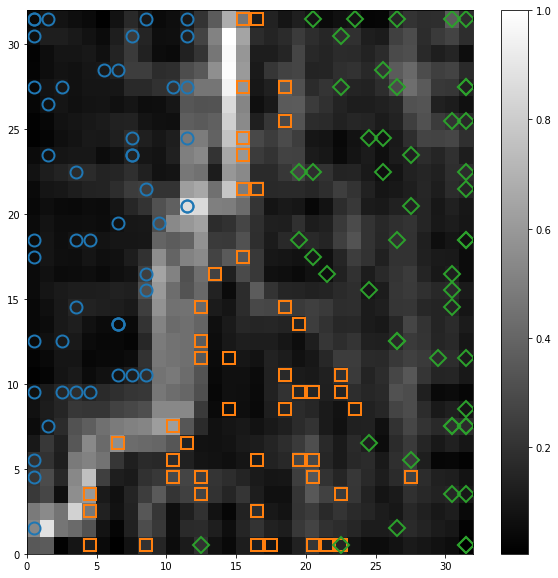

In [67]:
plt.figure(figsize=(10, 10))
plt.pcolor(model['model'].distance_map().T, cmap='gray')
plt.colorbar()

target_values = output_df.values
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(input_data):
    w = model['model'].winner(xx)  # getting the winner
    plt.plot(w[0]+.5, w[1]+.5, markers[target_values[cnt]], markerfacecolor='None',
             markeredgecolor=colors[target_values[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 32, 0, 32])
plt.show()

We can see that the model could separete the classes very well. The class represented in blue is totally isolated. The orange and green are very well separeted too but with some minor confusions.

# Hit Map

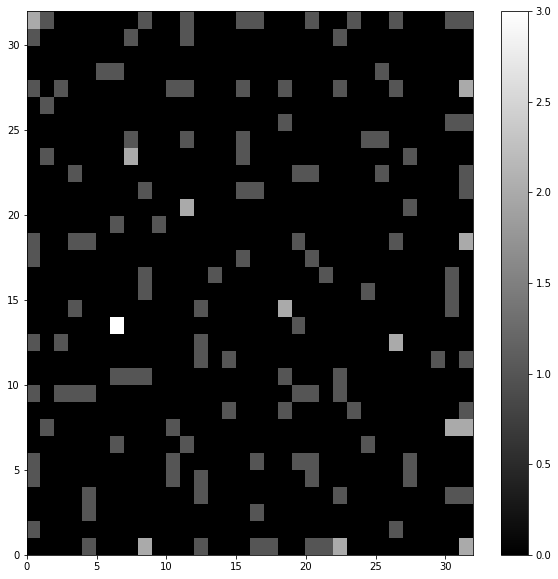

In [68]:
plt.figure(figsize=(10, 10))
frequencies = model['model'].activation_response(input_data)
plt.pcolor(frequencies.T, cmap='gray') 
plt.colorbar()
plt.show()